### Taller 5

In [211]:
import numpy as np
import pandas as pd

In [212]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )
df=df.dropna()

In [213]:
df.head

<bound method NDFrame.head of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3

Coficicación de las variables cualitativas

In [214]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

Separamos los datos de entrenamiento y prueba

In [215]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Etiquetas

In [216]:
train_X = train[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
test_X = test[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [217]:
train_X.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight'], dtype='object')

In [218]:
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf

In [219]:
norm = tf.keras.layers.Normalization()

In [220]:
norm.adapt(np.array(train_X))

### Creación del modelo

In [221]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [222]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [223]:
%%time
history = dnn_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 19.6780 - val_loss: 8.4074
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.3591 - val_loss: 4.8861
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.3140 - val_loss: 4.2931
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.3265 - val_loss: 3.0079
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.4203 - val_loss: 3.2984
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.4902 - val_loss: 2.9450
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.1510 - val_loss: 3.0355
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.0214 - val_loss: 3.1171
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2140 - val_loss: 2.8090
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.0380 - val_loss: 2.9415
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1236 - val_loss: 2.8204
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.1207 - val_loss: 3.3751


In [224]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'Model_0'

In [225]:
hist.head()

,loss,val_loss,epoch,model
0,16.238308,8.407353,0,Model_0
1,7.948200,4.886149,1,Model_0
2,5.225797,4.293059,2,Model_0
3,4.253670,3.007923,3,Model_0
4,3.630360,3.298355,4,Model_0


In [226]:
import matplotlib.pyplot as plt

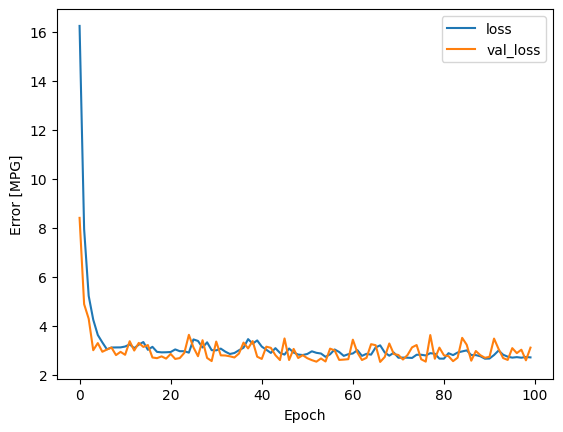

In [227]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [228]:
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Normalization(),  # Suponiendo que 'norm' es una capa de normalización
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

dnn_model.build(input_shape=(None, 4))  # Especificamos que la entrada tiene 4 características
dnn_model.summary()


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_11                │ (None, 4)              │             9 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202 (812.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 9 (40.00 B)

creación de 3 casos diferentes al modelo base

Modelo 1

In [229]:
model3_1 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])


In [230]:
model3_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [231]:
%%time
history31 = model3_1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 22.3051 - val_loss: 11.3623
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.8348 - val_loss: 9.1024
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.0380 - val_loss: 4.8144
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.3586 - val_loss: 4.8847
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.9353 - val_loss: 3.1143
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9091 - val_loss: 3.2850
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.4216 - val_loss: 2.9789
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.1032 - val_loss: 3.0847
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0152 - val_loss: 2.9041
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2881 - val_loss: 2.7827
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9410 - val_loss: 2.7203
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.1204 - val_

In [232]:
hist1 = pd.DataFrame(history31.history)
hist1['epoch'] = history31.epoch
hist1['model'] = 'Model_1'

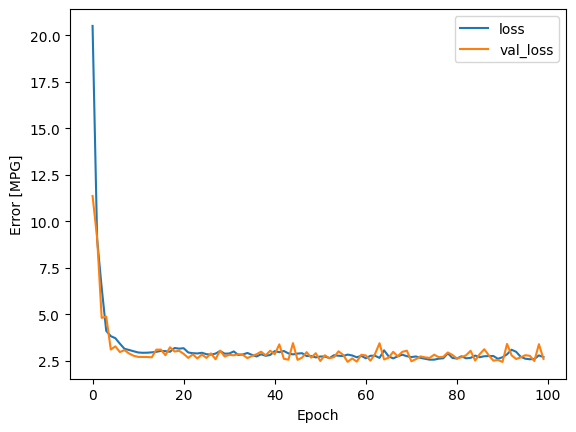

In [233]:
plt.plot(history31.history['loss'], label='loss')
plt.plot(history31.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 2

In [234]:
model3_2 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [235]:
model3_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [236]:
%%time
history32 = model3_2.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 19.0448 - val_loss: 8.5636
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.5273 - val_loss: 3.7160
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.6159 - val_loss: 3.3747
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.7536 - val_loss: 3.1066
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.3575 - val_loss: 2.8796
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.0018 - val_loss: 2.6389
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2282 - val_loss: 2.6906
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2014 - val_loss: 3.4471
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.5070 - val_loss: 3.3960
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5866 - val_loss: 3.8150
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.6698 - val_loss: 3.9257
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.5582 - val_l

In [237]:
hist2 = pd.DataFrame(history32.history)
hist2['epoch'] = history32.epoch
hist2['model'] = 'Model_2'

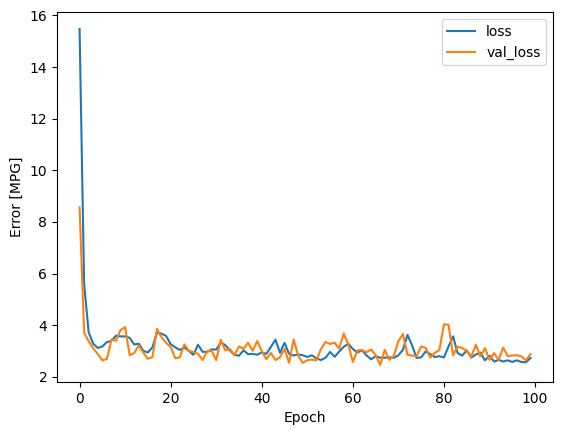

In [238]:
plt.plot(history32.history['loss'], label='loss')
plt.plot(history32.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 3

In [239]:
model3_3 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [240]:
model3_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [241]:
%%time
history33 = model3_3.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 17.5432 - val_loss: 5.7295
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0642 - val_loss: 4.2344
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.0921 - val_loss: 4.4715
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9574 - val_loss: 3.4920
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1617 - val_loss: 3.1995
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2056 - val_loss: 3.1737
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.2518 - val_loss: 3.1503
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.3671 - val_loss: 2.7858
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1795 - val_loss: 2.7715
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9873 - val_loss: 3.0786
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2067 - val_loss: 3.1851
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.6210 - val_l

In [242]:
hist3 = pd.DataFrame(history33.history)
hist3['epoch'] = history33.epoch
hist3['model'] = 'Model_3'

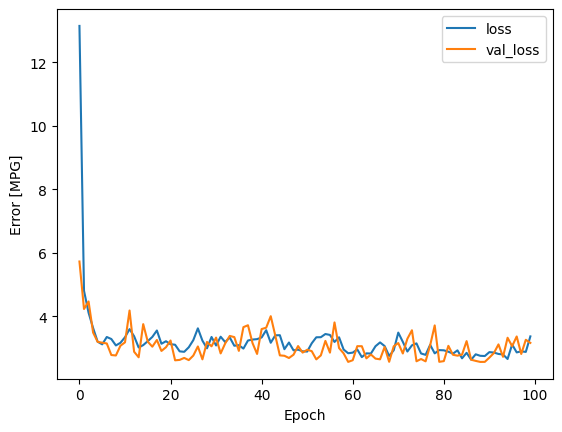

In [243]:
plt.plot(history33.history['loss'], label='loss')
plt.plot(history33.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [244]:
hist_t = pd.concat([hist,hist1,hist2,hist3], ignore_index=True)

In [245]:
import seaborn as sns


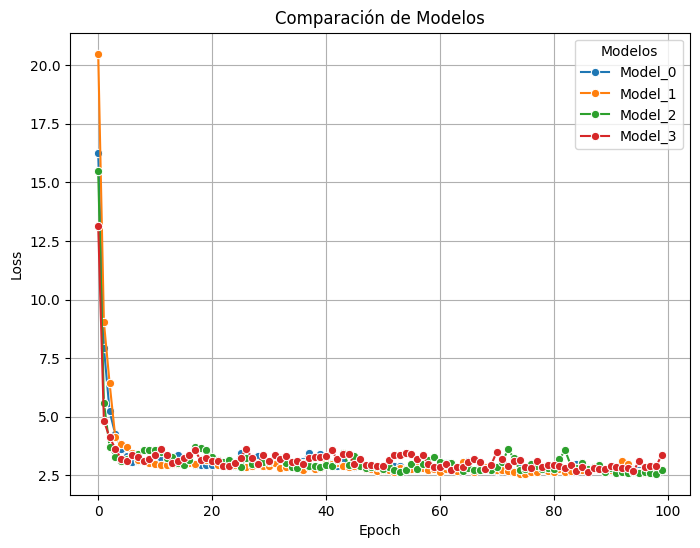

In [246]:

plt.figure(figsize=(8,6))

sns.lineplot(data=hist_t, x='epoch', y='loss', hue='model', linestyle='solid', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

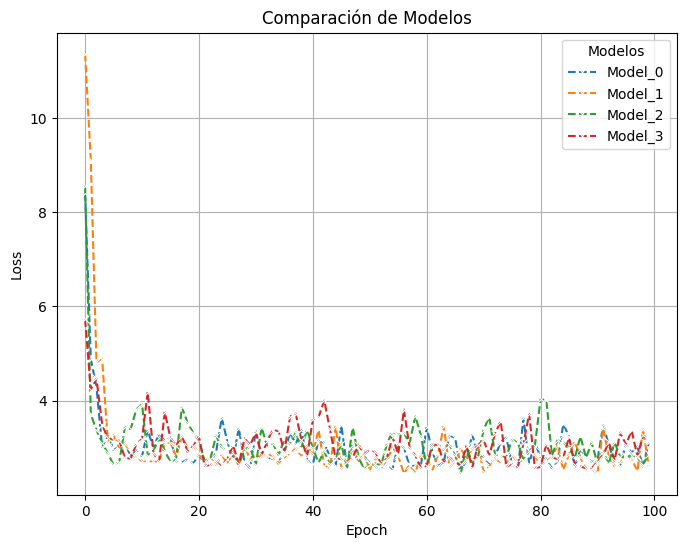

In [247]:

plt.figure(figsize=(8,6))
sns.lineplot(data=hist_t, x='epoch', y='val_loss', hue='model', linestyle='dashed', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

Las diferencias entre los modelos fueron mínimas, por lo que no se puede observar en la escala normal. Para esto, se graficó la diferencia entre cada modelo modificado con el original, generando los siguientes resultados.

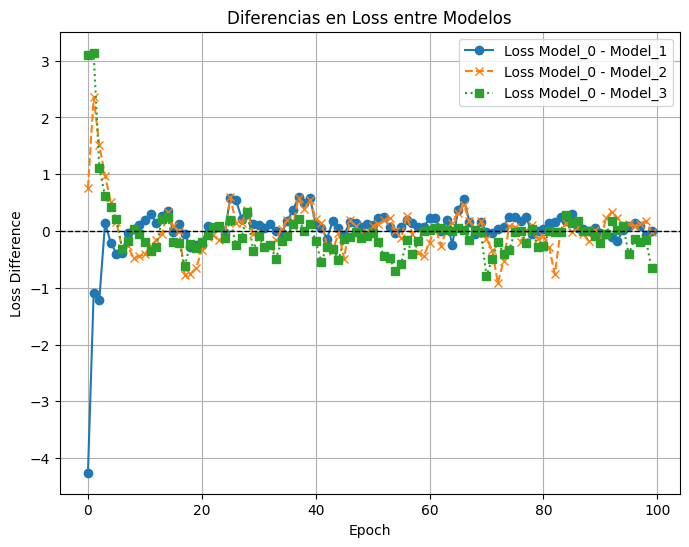

In [248]:



#Calcular las diferencias entre modelos
diff01 = hist['loss'] - hist1['loss']
diff02 = hist['loss'] - hist2['loss']
diff03 = hist['loss'] - hist3['loss']

#Graficar las diferencias
plt.figure(figsize=(8,6))
plt.plot(hist['epoch'], diff01, label='Loss Model_0 - Model_1', linestyle='solid', marker='o')
plt.plot(hist['epoch'], diff02, label='Loss Model_0 - Model_2', linestyle='dashed', marker='x')
plt.plot(hist['epoch'], diff03, label='Loss Model_0 - Model_3', linestyle='dotted', marker='s')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss Difference')
plt.title('Diferencias en Loss entre Modelos')
plt.legend()
plt.grid(True)
plt.show()


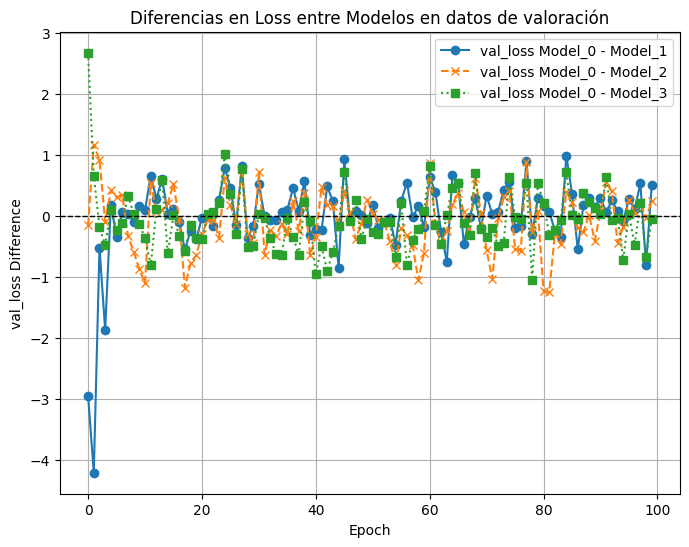

In [249]:


#Calcular las diferencias entre modelos
diff01 = hist['val_loss'] - hist1['val_loss']
diff02 = hist['val_loss'] - hist2['val_loss']
diff03 = hist['val_loss'] - hist3['val_loss']

#Graficar las diferencias
plt.figure(figsize=(8,6))
plt.plot(hist['epoch'], diff01, label='val_loss Model_0 - Model_1', linestyle='solid', marker='o')
plt.plot(hist['epoch'], diff02, label='val_loss Model_0 - Model_2', linestyle='dashed', marker='x')
plt.plot(hist['epoch'], diff03, label='val_loss Model_0 - Model_3', linestyle='dotted', marker='s')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('val_loss Difference')
plt.title('Diferencias en Loss entre Modelos en datos de valoración')
plt.legend()
plt.grid(True)
plt.show()


In [252]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
model3_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
model3_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
model3_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Validación con datos de test

In [257]:
dict_test={}
dict_test['Modelo_0']=dnn_model.evaluate(
    test_X,
    test_y, verbose=0
)
dict_test['Modelo_1']=model3_1.evaluate(
    test_X,
    test_y, verbose=0
)
dict_test['Modelo_2']=model3_2.evaluate(
    test_X,
    test_y, verbose=0
)
dict_test['Modelo_3']=model3_3.evaluate(
    test_X,
    test_y, verbose=0
)
dict_test

{'Modelo_0': 58.94758605957031,
 'Modelo_1': 2.7433841228485107,
 'Modelo_2': 2.9200246334075928,
 'Modelo_3': 2.8326051235198975}